14 1.0 7.142857142857142
21 12.0 57.14285714285714


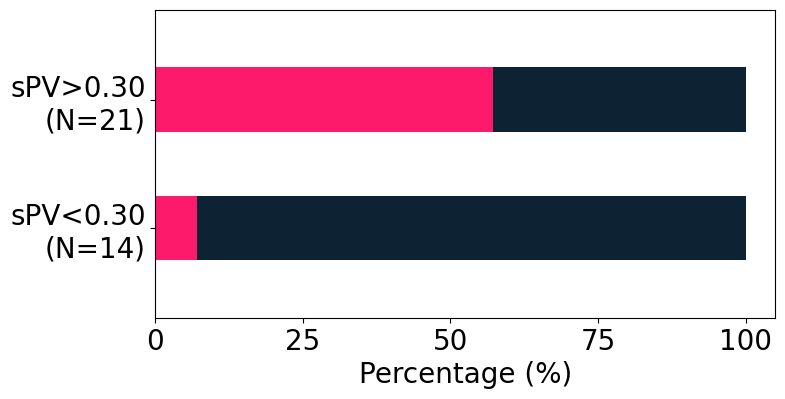

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

save_option = True
figsavepath = "../Figures/FigureS20_visible-defects.svg"

path = "../Data/01_SUMMARY.xlsx"
df = pd.read_excel(path)

X = df['PV'].to_list()
Y = df['Crack'].to_list()

threshold = 0.3

# remove failed data
# False_check = df['FALSE'].to_list()
# False_indices = [i for i, x in enumerate(False_check) if x == 1]
# for index in sorted(False_indices, reverse=True):
#     del X[index]
#     del Y[index]

# remove nan
nan_indices = [i for i, x in enumerate(Y) if isinstance(x, float) and math.isnan(x)]
for index in sorted(nan_indices, reverse=True):
    del X[index]
    del Y[index]

Y1, Y2 = [], []
for x, y in zip(X,Y):
    if x < threshold:
        Y1.append(y)
    else:
        Y2.append(y)

crack_Y1 = sum(Y1)/len(Y1)*100 #%
crack_Y2 = sum(Y2)/len(Y2)*100 #%
print(len(Y1),sum(Y1), crack_Y1)
print(len(Y2),sum(Y2), crack_Y2)

df = pd.DataFrame([[crack_Y1, 100-crack_Y1],[crack_Y2, 100 - crack_Y2]], 
                       columns=['defective', 'non defective'], 
                       index=[f'sPV<{threshold:.2f}\n(N={len(Y1)})', f'sPV>{threshold:.2f}\n(N={len(Y2)})'])

colors = ["#FE1A6A","#0D2333"]

n_rows, n_cols = df.shape
positions = np.arange(n_rows)
offsets = np.zeros(n_rows, dtype=df.values.dtype)

plt.rcParams["font.size"] = 20
fig, ax = plt.subplots(figsize=(8,4))
ax.set_yticks(positions)
ax.set_yticklabels(df.index)

for i in range(len(df.columns)):
    bar = ax.barh(positions, df.iloc[:, i], left=offsets, color=colors[i], height=0.5)
    offsets += df.iloc[:, i]

ax.set_xlabel('Percentage (%)')
ax.set_ylim(-0.7,1.7)
ax.set_xticks([0,25,50,75,100])

if save_option:
    plt.savefig(figsavepath, dpi=1200, bbox_inches='tight')
plt.show()